# The ARAR Model:
The ARAR model applies a memory-shortening transformation if the underlying process of a given time series ${Y_{t}, t = 1, 2, ..., n}$ is "long-memory" then it fits an autoregressive model.

## Memory Shortening

The model follows five steps to classify ${Y_{t}}$ and take one of the following three actions:


* L: declare ${Y_{t}}$ as long memory and form  ${Y_{t}}$ by ${\tilde{Y}_{t} = Y_{t} - \hat{\phi}Y_{t - \hat{\tau}}}$
* M: declare ${Y_{t}}$ as moderately long memory and form  ${Y_{t}}$ by ${\tilde{Y}_{t} = Y_{t} - \hat{\phi}_{1}Y_{t -1} - \hat{\phi}_{2}Y_{t -2}}$
* S: declare ${Y_{t}}$ as short memory.

If ${Y_{t}}$ declared to be $L$ or $M$ then the series ${Y_{t}}$ is transformed again until. The transformation process continuous until the transformed series is classified as short memory. However, the maximum number of transformation process is three, it is very rare a time series require more than 2.

* 1. For each $\tau = 1, 2, ..., 15$, we find the value $\hat{\phi(\tau)} $ of $\hat{\phi}$ that minimizes $ERR(\phi, \tau) = \frac{\sum_{t=\tau +1 }^{n} [Y_{t} - \phi Y_{t-\tau}]^2 }{\sum_{t=\tau +1 }^{n} Y_{t}^{2}}$ then define $Err(\tau) = ERR(\hat{\phi(\tau), \tau})$ and choose the lag $\hat{\tau}$ to be the value of $\tau$ that minimizes  $Err(\tau)$.
* 2. If $Err(\hat{\tau}) \leq  8/n$,  ${Y_{t}}$ is a long-memory series.
* 3. If $\hat{\phi}( \hat{\tau} ) \geq 0.93$ and $\hat{\tau} > 2$,  ${Y_{t}}$ is a long-memory series.
* 4. If $\hat{\phi}( \hat{\tau} ) \geq 0.93$ and $\hat{\tau} = 1$ or $2$, ${Y_{t}}$ is a long-memory series.
* 5. If $\hat{\phi}( \hat{\tau} ) < 0.93$, ${Y_{t}}$ is a short-memory series.


## Subset Autoregressive Model:

In the following we will describe how ARAR algorithm fits an autoregressive process to the mean-corrected series $X_{t} = S_{t}- {\bar{S}}$, $t = k+1, ..., n$ where ${S_{t}, t = k + 1, ..., n}$ is the memory-shortened version of  ${Y_{t}}$ which derived from the five steps we described above and $\bar{S}$ is the sample mean of $S_{k+1}, ..., S_{n}$.

The fitted model has the following form:

$X_{t} = \phi_{1}X{t-1} + \phi_{1}X_{t-l_{1}} + \phi_{1}X_{t- l_{1}} + \phi_{1}X_{t-l_{1}} + Z$

where $Z \sim WN(0, \sigma^{2})$. The coefficients $\phi_{j}$ and white noise variance $\sigma^2$ can be derived from the Yule-Walker equations for given lags $l_1, l_2,$ and $l_3$ :

\begin{equation}
\begin{bmatrix}
1 & \hat{\rho}(l_1 - 1) & \hat{\rho}(l_2 - 1) & \hat{\rho}(l_3 - 1)\\
\hat{\rho}(l_1 - 1) &1 & \hat{\rho}(l_2 - l_1) & \hat{\rho}(l_3 - l_1)\\
\hat{\rho}(l_2 - 1) & \hat{\rho}(l_2 - l_1) & 1 & \hat{\rho}(l_2 - l_2)\\
\hat{\rho}(l_3 - 1) & \hat{\rho}(l_3 - l_1) & \hat{\rho}(l_3 - l_1) & 1
\end{bmatrix}*\begin{bmatrix}
\phi_{1} \\
\phi_{l_1} \\
\phi_{l_2}\\
\phi_{l_3}
\end{bmatrix} = \begin{bmatrix} \hat{\rho}(1) \\ \hat{\rho}(l_1) \\ \hat{\rho}(l_2)\\ \hat{\rho}(l_3) \end{bmatrix}
\end{equation}

and $\sigma^2 = \hat{\gamma}(0) [1-\phi_1\hat{\rho}(1)] - \phi_{l_1}\hat{\rho}(l_1)] - \phi_{l_2}\hat{\rho}(l_2)] - \phi_{l_3}\hat{\rho}(l_3)]$, where $\hat{\gamma}(j)$ and $\hat{\rho}(j), j = 0, 1, 2, ...,$ are the sample autocovariances and autocorelations of the series $X_{t}$.

The algorithm computes the coefficients of $\phi(j)$ for each set of lags where $1<l_1<l_2<l_3 \leq m$ where m chosen to be 13 or 26. The algorithm selects the model that the Yule-Walker estimate of $\sigma^2$ is minimal.

## Forecasting

If short-memory filter found in first step it has coefficients $\Psi_0, \Psi_1, ..., \Psi_k (k \geq0)$ where $\Psi_0 = 1$. In this case the transforemed series can be expressed as
\begin{equation}
    S_t = \Psi(B)Y_t = Y_t + \Psi_1 Y_{t-1} + ...+ \Psi_k Y_{t-k},
\end{equation}
where $\Psi(B) = 1 + \Psi_1B + ...+ \Psi_k B^k$ is polynomial in the back-shift operator.

If the coefficients of the subset autoregression found in the second step it has coefficients $\phi_1, \phi_{l_1},  \phi_{l_2}$ and $\phi_{l_3}$ then the subset AR model for $X_t = S_t - \bar{S}$ is

\begin{equation}
    \phi(B)X_t = Z_t,
\end{equation}

where $Z_t$ is a white-noise series with zero mean and constant variance and $\phi(B) = 1 - \phi_1B - \phi_{l_1}B^{l_1} - \phi_{l_2}B^{l_2} - \phi_{l_3}B^{l_3}$. From equation (1) and (2) one can obtain

\begin{equation}
    \xi(B)Y_t = \phi(1)\bar{S} + Z_t,
\end{equation}
where $\xi (B) = \Psi(B)\phi(B)$.

Assuming the fitted model in equation (3) is an appropriate model, and $Z_t$ is uncorrelated with $Y_j, j <t$ $\forall t \in T$, one can determine minimum mean squared error linear predictors $P_n Y_{n + h}$ of $Y_{n+h}$ in terms of ${1, Y_1, ..., Y_n}$ for $n > k + l_3$, from recursions

\begin{equation}
    P_n Y_{n+h} = - \sum_{j = 1}^{k + l_3} \xi P_nY_{n+h-j} + \phi(1)\bar{S},  h\geq 1,
\end{equation}
with the initial conditions $P_n Y_{n+h} = Y_{n + h}$, for $h\leq0$.

Ref: Brockwell, Peter J, and Richard A. Davis. Introduction to Time Series and Forecasting. [Springer](https://link.springer.com/book/10.1007/978-3-319-29854-2) (2016)

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)

import skforecast
print(skforecast.__version__)

/home/akayr/Insync/resul.akay@quantics.io/Google Drive/Data Science/Experimental/Python Active Development/skforecast
0.18.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.stats import Arar
from skforecast.sarimax import Sarimax
from skforecast.experimental import ForecasterStats, backtesting_stats
from skforecast.model_selection import TimeSeriesFold
from skforecast.datasets import load_demo_dataset
from skforecast.plot import set_dark_theme

# Data

In [3]:
# Data
# ==============================================================================
y = load_demo_dataset()
y

datetime
1991-07-01    0.429795
1991-08-01    0.400906
1991-09-01    0.432159
1991-10-01    0.492543
1991-11-01    0.502369
                ...   
2008-02-01    0.761822
2008-03-01    0.649435
2008-04-01    0.827887
2008-05-01    0.816255
2008-06-01    0.762137
Freq: MS, Name: y, Length: 204, dtype: float64

# ARAR

In [4]:
# ARAR model
# ==============================================================================
model = Arar()
model.fit(y)

,max_ar_depth,26
,max_lag,40
,safe,True


In [5]:
model.predict(steps=10)

array([1.06143577, 1.10532285, 1.12872236, 1.18860106, 1.19689617,
       1.22331801, 1.28466766, 0.76413015, 0.69874381, 0.81066685])

In [6]:
model.predict_interval(steps=10, level=[95])

,mean,lower_95,upper_95
step,,,
1,1.061436,0.949028,1.173844
2,1.105323,0.992605,1.218041
3,1.128722,1.010141,1.247304
4,1.188601,1.063973,1.313229
5,1.196896,1.071092,1.322700
6,1.223318,1.095167,1.351469
7,1.284668,1.155178,1.414157
8,0.764130,0.633857,0.894403
9,0.698744,0.567700,0.829788


In [7]:
model.get_params()

{'max_ar_depth': 26, 'max_lag': 40, 'safe': True}

# ForecasterStats

In [8]:
forecaster = ForecasterStats(
    regressor=Arar(),
)
forecaster

=============== 
ForecasterStats 
=============== 
Regressor: Arar() 
Series name: None 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'max_ar_depth': None, 'max_lag': None, 'safe': True} 
fit_kwargs: {} 
Creation date: 2025-09-18 12:33:36 
Last fit date: None 
Index seen by the forecaster: None 
Skforecast version: 0.18.0 
Python version: 3.11.13 
Forecaster id: None

In [9]:
forecaster.fit(y=y)
forecaster

=============== 
ForecasterStats 
=============== 
Regressor: Arar(max_ar_depth=26, max_lag=40) 
Series name: y 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2008-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'max_ar_depth': 26, 'max_lag': 40, 'safe': True} 
fit_kwargs: {} 
Creation date: 2025-09-18 12:33:36 
Last fit date: 2025-09-18 12:33:43 
Index seen by the forecaster: DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='datetime', length=204, freq='MS') 
Skforecast version: 0.18.0 
Python version: 3.11.13 
Forecaster id: None

In [10]:
forecaster.predict(steps=10)

2008-07-01    1.061436
2008-08-01    1.105323
2008-09-01    1.128722
2008-10-01    1.188601
2008-11-01    1.196896
2008-12-01    1.223318
2009-01-01    1.284668
2009-02-01    0.764130
2009-03-01    0.698744
2009-04-01    0.810667
Freq: MS, Name: pred, dtype: float64

In [11]:
forecaster.predict_interval(steps=10, alpha=0.05)

,pred,lower_bound,upper_bound
2008-07-01,1.061436,0.949028,1.173844
2008-08-01,1.105323,0.992605,1.218041
2008-09-01,1.128722,1.010141,1.247304
2008-10-01,1.188601,1.063973,1.313229
2008-11-01,1.196896,1.071092,1.322700
2008-12-01,1.223318,1.095167,1.351469
2009-01-01,1.284668,1.155178,1.414157
2009-02-01,0.764130,0.633857,0.894403
2009-03-01,0.698744,0.567700,0.829788
2009-04-01,0.810667,0.679155,0.942179


In [12]:
# Backtesting
# ==============================================================================
cv = TimeSeriesFold(
    initial_train_size = 100,
    steps              = 10,
    refit              = False,
)

metric, predictions = backtesting_stats(
    y               = y,
    forecaster      = forecaster,
    cv              = cv,
    metric          = 'mean_absolute_error',
    verbose         = False
)

╭─────────────────────────────── IgnoredArgumentWarning ───────────────────────────────╮
│ If `ForecasterStats` uses `Arar` as regressor, `cv.refit` must be `True` since       │
│ predictions must start from the end of the training set. Setting `cv.refit = True`.  │
│                                                                                      │
│ Category : skforecast.exceptions.IgnoredArgumentWarning                              │
│ Location : /home/akayr/Insync/resul.akay@quantics.io/Google Drive/Data               │
│ Science/Experimental/Python Active                                                   │
│ Development/skforecast/skforecast/experimental/_validation.py:135                    │
│ Suppress : warnings.simplefilter('ignore', category=IgnoredArgumentWarning)          │
╰──────────────────────────────────────────────────────────────────────────────────────╯


100%|██████████| 11/11 [00:00<00:00, 36.69it/s]


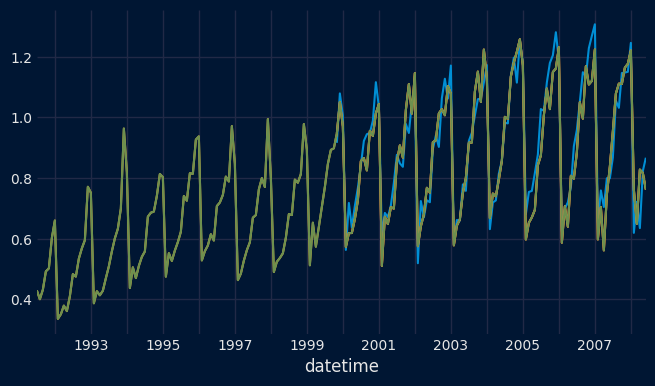

In [16]:
set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 4))
predictions['pred'].plot(ax=ax)
y.loc[predictions.index].plot(ax=ax)
y.plot(ax=ax)
y.loc[y.index].plot(ax=ax);